## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.3, 0.5, 0.7, 0.9]
redice_lr_patient = [5, 7, 9]

In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.30, reduce_patient: 5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/25


50000/50000 [==============================] - 5s 97us/step - loss: 1.6664 - accuracy: 0.4150 - val_loss: 1.6664 - val_accuracy: 0.4144
Epoch 17/25
50000/50000 [==============================] - 5s 98us/step - loss: 1.6548 - accuracy: 0.4206 - val_loss: 1.6547 - val_accuracy: 0.4161
Epoch 18/25
50000/50000 [==============================] - 5s 96us/step - loss: 1.6434 - accuracy: 0.4249 - val_loss: 1.6449 - val_accuracy: 0.4253
Epoch 19/25
50000/50000 [==============================] - 5s 96us/step - loss: 1.6332 - accuracy: 0.4299 - val_loss: 1.6333 - val_accuracy: 0.4290
Epoch 20/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.6210 - accuracy: 0.4334 - val_loss: 1.6250 - val_accuracy: 0.4294
Epoch 21/25
50000/50000 [==============================] - 5s 100us/step - loss: 1.6104 - accuracy: 0.4377 - val_loss: 1.6144 - val_accuracy: 0.4344
Epoch 22/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.5999 - accuracy: 0.4408 - val_loss: 1.60

50000/50000 [==============================] - 5s 98us/step - loss: 1.8278 - accuracy: 0.3614 - val_loss: 1.8171 - val_accuracy: 0.3688
Epoch 7/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.8015 - accuracy: 0.3701 - val_loss: 1.7916 - val_accuracy: 0.3760
Epoch 8/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.7783 - accuracy: 0.3776 - val_loss: 1.7705 - val_accuracy: 0.3829
Epoch 9/25
50000/50000 [==============================] - 5s 98us/step - loss: 1.7574 - accuracy: 0.3855 - val_loss: 1.7509 - val_accuracy: 0.3892
Epoch 10/25
50000/50000 [==============================] - 5s 100us/step - loss: 1.7385 - accuracy: 0.3919 - val_loss: 1.7343 - val_accuracy: 0.3954
Epoch 11/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.7216 - accuracy: 0.3972 - val_loss: 1.7158 - val_accuracy: 0.3988
Epoch 12/25
50000/50000 [==============================] - 5s 99us/step - loss: 1.7056 - accuracy: 0.4028 - val_loss: 1.7007 

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 5s 100us/step - loss: 2.2598 - accuracy: 0.1513 - val_loss: 2.1838 - val_accuracy: 0.2250
Epoch 2/25
50000/50000 [==============================] - 5s 99us/step - loss: 2.1135 - accuracy: 0.2449 - val_loss: 2.0442 - val_accuracy: 0.2674
Epoch 3/25
50000/50000 [==============================] - 5s 99us/step - loss: 1.9929 - accuracy: 0.2933 - val_loss: 1.9475 - val_accuracy: 0.3133
Epoch 4/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.9179 - accuracy: 0.3242 - val_loss: 1.8915 - val_accuracy: 0.3383
Epoch 5/25
50000/50000 [==============================] - 5s 98us/step - loss: 1.8715 - accuracy: 0.3419 - val_loss: 1.8544 - val_accuracy: 0.3541
Epoch 6/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.8387 - accuracy: 0.3547 - val_loss: 1.8262 - val_accuracy: 0.3599
Epoch 7/25
50000/50000 [==============================] - 5s 101us

50000/50000 [==============================] - 5s 100us/step - loss: 1.5993 - accuracy: 0.4387 - val_loss: 1.6068 - val_accuracy: 0.4335
Epoch 24/25
50000/50000 [==============================] - 5s 98us/step - loss: 1.5900 - accuracy: 0.4427 - val_loss: 1.5988 - val_accuracy: 0.4393ccura
Epoch 25/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.5804 - accuracy: 0.4462 - val_loss: 1.5920 - val_accuracy: 0.4381
Numbers of exp: 7, reduce_factor: 0.70, reduce_patient: 7
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________

50000/50000 [==============================] - 5s 97us/step - loss: 1.6951 - accuracy: 0.4056 - val_loss: 1.6907 - val_accuracy: 0.4073
Epoch 14/25
50000/50000 [==============================] - 6s 112us/step - loss: 1.6806 - accuracy: 0.4101 - val_loss: 1.6788 - val_accuracy: 0.4093
Epoch 15/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.6673 - accuracy: 0.4169 - val_loss: 1.6645 - val_accuracy: 0.4165
Epoch 16/25
50000/50000 [==============================] - 5s 104us/step - loss: 1.6532 - accuracy: 0.4212 - val_loss: 1.6525 - val_accuracy: 0.4215
Epoch 17/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.6414 - accuracy: 0.4250 - val_loss: 1.6395 - val_accuracy: 0.4231
Epoch 18/25
50000/50000 [==============================] - 9s 179us/step - loss: 1.6295 - accuracy: 0.4292 - val_loss: 1.6301 - val_accuracy: 0.4281
Epoch 19/25
50000/50000 [==============================] - 9s 178us/step - loss: 1.6181 - accuracy: 0.4319 - val_loss: 

50000/50000 [==============================] - 5s 98us/step - loss: 1.9973 - accuracy: 0.2955 - val_loss: 1.9573 - val_accuracy: 0.3089
Epoch 4/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.9292 - accuracy: 0.3227 - val_loss: 1.9028 - val_accuracy: 0.3305
Epoch 5/25
50000/50000 [==============================] - 5s 98us/step - loss: 1.8836 - accuracy: 0.3411 - val_loss: 1.8649 - val_accuracy: 0.3459
Epoch 6/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.8499 - accuracy: 0.3546 - val_loss: 1.8353 - val_accuracy: 0.3573
Epoch 7/25
50000/50000 [==============================] - 5s 98us/step - loss: 1.8235 - accuracy: 0.3640 - val_loss: 1.8102 - val_accuracy: 0.3665
Epoch 8/25
50000/50000 [==============================] - 6s 118us/step - loss: 1.7997 - accuracy: 0.3714 - val_loss: 1.7880 - val_accuracy: 0.3748
Epoch 9/25
50000/50000 [==============================] - 5s 99us/step - loss: 1.7782 - accuracy: 0.3801 - val_loss: 1.7671 - v

Numbers of exp: 12, reduce_factor: 0.30, reduce_patient: 5
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/2

50000/50000 [==============================] - 5s 105us/step - loss: 1.4542 - accuracy: 0.4806 - val_loss: 1.4926 - val_accuracy: 0.4669
Epoch 17/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.4480 - accuracy: 0.4835 - val_loss: 1.4837 - val_accuracy: 0.4722
Epoch 18/25
50000/50000 [==============================] - 8s 157us/step - loss: 1.4416 - accuracy: 0.4867 - val_loss: 1.4786 - val_accuracy: 0.4715
Epoch 19/25
50000/50000 [==============================] - 8s 159us/step - loss: 1.4304 - accuracy: 0.4897 - val_loss: 1.4758 - val_accuracy: 0.4728
Epoch 20/25
50000/50000 [==============================] - 7s 137us/step - loss: 1.4288 - accuracy: 0.4907 - val_loss: 1.4791 - val_accuracy: 0.4735
Epoch 21/25
50000/50000 [==============================] - 7s 131us/step - loss: 1.4234 - accuracy: 0.4944 - val_loss: 1.4792 - val_accuracy: 0.4711
Epoch 22/25
50000/50000 [==============================] - 7s 133us/step - loss: 1.4073 - accuracy: 0.4990 - val_loss:

50000/50000 [==============================] - 6s 119us/step - loss: 1.6305 - accuracy: 0.4107 - val_loss: 1.6324 - val_accuracy: 0.4121
Epoch 7/25
50000/50000 [==============================] - 5s 106us/step - loss: 1.6109 - accuracy: 0.4174 - val_loss: 1.6063 - val_accuracy: 0.4244
Epoch 8/25
50000/50000 [==============================] - 6s 121us/step - loss: 1.5872 - accuracy: 0.4270 - val_loss: 1.5880 - val_accuracy: 0.4324
Epoch 9/25
50000/50000 [==============================] - 6s 118us/step - loss: 1.5678 - accuracy: 0.4353 - val_loss: 1.5698 - val_accuracy: 0.4378
Epoch 10/25
50000/50000 [==============================] - 7s 148us/step - loss: 1.5491 - accuracy: 0.4429 - val_loss: 1.5630 - val_accuracy: 0.4376
Epoch 11/25
50000/50000 [==============================] - 6s 113us/step - loss: 1.5437 - accuracy: 0.4427 - val_loss: 1.5540 - val_accuracy: 0.4436
Epoch 12/25
50000/50000 [==============================] - 6s 118us/step - loss: 1.5229 - accuracy: 0.4496 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 119us/step - loss: 2.4505 - accuracy: 0.1845 - val_loss: 1.9638 - val_accuracy: 0.2874
Epoch 2/25
50000/50000 [==============================] - 6s 113us/step - loss: 1.8700 - accuracy: 0.3226 - val_loss: 1.8015 - val_accuracy: 0.3536
Epoch 3/25
50000/50000 [==============================] - 6s 122us/step - loss: 1.7579 - accuracy: 0.3680 - val_loss: 1.7073 - val_accuracy: 0.3883
Epoch 4/25
50000/50000 [==============================] - 6s 129us/step - loss: 1.6937 - accuracy: 0.3913 - val_loss: 1.6882 - val_accuracy: 0.3963
Epoch 5/25
50000/50000 [==============================] - 8s 164us/step - loss: 1.6423 - accuracy: 0.4102 - val_loss: 1.6281 - val_accuracy: 0.4118
Epoch 6/25
50000/50000 [==============================] - 9s 172us/step - loss: 1.5972 - accuracy: 0.4266 - val_loss: 1.5845 - val_accuracy: 0.4350
Epoch 7/25
50000/50000 [==============================] - 8s 1

50000/50000 [==============================] - 5s 104us/step - loss: 1.4357 - accuracy: 0.4867 - val_loss: 1.4792 - val_accuracy: 0.4766
Epoch 24/25
50000/50000 [==============================] - 5s 106us/step - loss: 1.4260 - accuracy: 0.4899 - val_loss: 1.4890 - val_accuracy: 0.4734
Epoch 25/25
50000/50000 [==============================] - 5s 106us/step - loss: 1.4223 - accuracy: 0.4923 - val_loss: 1.4916 - val_accuracy: 0.4742
Numbers of exp: 19, reduce_factor: 0.70, reduce_patient: 7
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
__________________________

50000/50000 [==============================] - 6s 116us/step - loss: 1.5352 - accuracy: 0.4479 - val_loss: 1.5423 - val_accuracy: 0.4481
Epoch 14/25
50000/50000 [==============================] - 6s 122us/step - loss: 1.5247 - accuracy: 0.4522 - val_loss: 1.5457 - val_accuracy: 0.4494
Epoch 15/25
50000/50000 [==============================] - 6s 118us/step - loss: 1.5149 - accuracy: 0.4561 - val_loss: 1.5415 - val_accuracy: 0.4516
Epoch 16/25
50000/50000 [==============================] - 6s 114us/step - loss: 1.5050 - accuracy: 0.4590 - val_loss: 1.5291 - val_accuracy: 0.4487
Epoch 17/25
50000/50000 [==============================] - 6s 110us/step - loss: 1.4954 - accuracy: 0.4623 - val_loss: 1.5279 - val_accuracy: 0.4533
Epoch 18/25
50000/50000 [==============================] - 6s 115us/step - loss: 1.4921 - accuracy: 0.4643 - val_loss: 1.5318 - val_accuracy: 0.4543
Epoch 19/25
50000/50000 [==============================] - 7s 132us/step - loss: 1.4842 - accuracy: 0.4680 - val_loss:

50000/50000 [==============================] - 7s 130us/step - loss: 1.7692 - accuracy: 0.3589 - val_loss: 1.7397 - val_accuracy: 0.3751
Epoch 4/25
50000/50000 [==============================] - 6s 123us/step - loss: 1.7095 - accuracy: 0.3829 - val_loss: 1.7021 - val_accuracy: 0.3832
Epoch 5/25
50000/50000 [==============================] - 7s 134us/step - loss: 1.6741 - accuracy: 0.3975 - val_loss: 1.6470 - val_accuracy: 0.4096
Epoch 6/25
50000/50000 [==============================] - 7s 141us/step - loss: 1.6339 - accuracy: 0.4144 - val_loss: 1.6127 - val_accuracy: 0.4229
Epoch 7/25
50000/50000 [==============================] - 7s 138us/step - loss: 1.5963 - accuracy: 0.4290 - val_loss: 1.5846 - val_accuracy: 0.4350
Epoch 8/25
50000/50000 [==============================] - 7s 146us/step - loss: 1.5722 - accuracy: 0.4378 - val_loss: 1.5598 - val_accuracy: 0.4443
Epoch 9/25
50000/50000 [==============================] - 7s 142us/step - loss: 1.5542 - accuracy: 0.4452 - val_loss: 1.564

50000/50000 [==============================] - 6s 116us/step - loss: 1.3698 - accuracy: 0.5117 - val_loss: 1.4359 - val_accuracy: 0.4894
Numbers of exp: 24, reduce_factor: 0.30, reduce_patient: 5
Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 920,842
Trainable params: 920,842
Non-trainabl

50000/50000 [==============================] - 5s 104us/step - loss: 1.6139 - accuracy: 0.4236 - val_loss: 1.6111 - val_accuracy: 0.4218
Epoch 16/25
50000/50000 [==============================] - 5s 100us/step - loss: 1.5978 - accuracy: 0.4288 - val_loss: 1.6921 - val_accuracy: 0.3888
Epoch 17/25
50000/50000 [==============================] - 5s 101us/step - loss: 1.5900 - accuracy: 0.4327 - val_loss: 1.6414 - val_accuracy: 0.4225
Epoch 18/25
50000/50000 [==============================] - 5s 101us/step - loss: 1.5773 - accuracy: 0.4389 - val_loss: 1.5908 - val_accuracy: 0.4258
Epoch 19/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.5430 - accuracy: 0.4506 - val_loss: 1.6498 - val_accuracy: 0.4052
Epoch 20/25
50000/50000 [==============================] - 5s 100us/step - loss: 1.5486 - accuracy: 0.4494 - val_loss: 1.5003 - val_accuracy: 0.4676
Epoch 21/25
50000/50000 [==============================] - 5s 104us/step - loss: 1.5124 - accuracy: 0.4597 - val_loss:

Epoch 5/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.8785 - accuracy: 0.3257 - val_loss: 1.8196 - val_accuracy: 0.3410
Epoch 6/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.8482 - accuracy: 0.3375 - val_loss: 1.7816 - val_accuracy: 0.3666
Epoch 7/25
50000/50000 [==============================] - 5s 107us/step - loss: 1.8045 - accuracy: 0.3547 - val_loss: 1.8055 - val_accuracy: 0.3467
Epoch 8/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.7798 - accuracy: 0.3598 - val_loss: 1.7173 - val_accuracy: 0.3910
Epoch 9/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.7385 - accuracy: 0.3755 - val_loss: 1.6351 - val_accuracy: 0.4159
Epoch 10/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.7173 - accuracy: 0.3847 - val_loss: 1.7984 - val_accuracy: 0.3533
Epoch 11/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.6815 - accuracy: 0.3984 - va

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 5s 105us/step - loss: 2.2651 - accuracy: 0.1838 - val_loss: 2.0973 - val_accuracy: 0.2238
Epoch 2/25
50000/50000 [==============================] - 5s 101us/step - loss: 2.0445 - accuracy: 0.2585 - val_loss: 1.9526 - val_accuracy: 0.2829
Epoch 3/25
50000/50000 [==============================] - 5s 107us/step - loss: 1.9565 - accuracy: 0.2973 - val_loss: 1.9054 - val_accuracy: 0.3111
Epoch 4/25
50000/50000 [==============================] - 5s 107us/step - loss: 1.8832 - accuracy: 0.3274 - val_loss: 1.8430 - val_accuracy: 0.3275
Epoch 5/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.8420 - accuracy: 0.3408 - val_loss: 1.7758 - val_accuracy: 0.3627
Epoch 6/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.7999 - accuracy: 0.3576 - val_loss: 1.7828 - val_accuracy: 0.3685
Epoch 7/25
50000/50000 [==============================] - 6s 1

50000/50000 [==============================] - 5s 100us/step - loss: 1.4092 - accuracy: 0.5016 - val_loss: 1.5211 - val_accuracy: 0.4522
Epoch 23/25
50000/50000 [==============================] - 5s 100us/step - loss: 1.4022 - accuracy: 0.5020 - val_loss: 1.4246 - val_accuracy: 0.4965
Epoch 24/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.3823 - accuracy: 0.5112 - val_loss: 1.4413 - val_accuracy: 0.4816
Epoch 25/25
50000/50000 [==============================] - 5s 100us/step - loss: 1.3748 - accuracy: 0.5146 - val_loss: 1.4722 - val_accuracy: 0.4755
Numbers of exp: 31, reduce_factor: 0.70, reduce_patient: 7
Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________

50000/50000 [==============================] - 5s 104us/step - loss: 1.6252 - accuracy: 0.4240 - val_loss: 1.6509 - val_accuracy: 0.4182
Epoch 13/25
50000/50000 [==============================] - 6s 111us/step - loss: 1.6081 - accuracy: 0.4312 - val_loss: 1.5889 - val_accuracy: 0.4262
Epoch 14/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.5841 - accuracy: 0.4379 - val_loss: 1.6461 - val_accuracy: 0.4098
Epoch 15/25
50000/50000 [==============================] - 5s 100us/step - loss: 1.5668 - accuracy: 0.4435 - val_loss: 1.6549 - val_accuracy: 0.4145
Epoch 16/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.5509 - accuracy: 0.4519 - val_loss: 1.5528 - val_accuracy: 0.4472
Epoch 17/25
50000/50000 [==============================] - 7s 137us/step - loss: 1.5400 - accuracy: 0.4545 - val_loss: 1.5084 - val_accuracy: 0.4617
Epoch 18/25
50000/50000 [==============================] - 5s 108us/step - loss: 1.5240 - accuracy: 0.4610 - val_loss:

50000/50000 [==============================] - 5s 104us/step - loss: 2.0072 - accuracy: 0.2775 - val_loss: 1.9127 - val_accuracy: 0.3114
Epoch 3/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.9160 - accuracy: 0.3093 - val_loss: 1.8878 - val_accuracy: 0.3135
Epoch 4/25
50000/50000 [==============================] - 5s 101us/step - loss: 1.8688 - accuracy: 0.3337 - val_loss: 1.8550 - val_accuracy: 0.3314
Epoch 5/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.8209 - accuracy: 0.3496 - val_loss: 1.8592 - val_accuracy: 0.33860s - loss: 1.8289 - 
Epoch 6/25
50000/50000 [==============================] - 5s 101us/step - loss: 1.7778 - accuracy: 0.3651 - val_loss: 1.6942 - val_accuracy: 0.3921
Epoch 7/25
50000/50000 [==============================] - 5s 101us/step - loss: 1.7433 - accuracy: 0.3818 - val_loss: 1.7322 - val_accuracy: 0.37585 - ac
Epoch 8/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.7172 - accuracy

50000/50000 [==============================] - 6s 128us/step - loss: 1.4499 - accuracy: 0.4846 - val_loss: 1.5828 - val_accuracy: 0.4369
Epoch 25/25
50000/50000 [==============================] - 5s 103us/step - loss: 1.4316 - accuracy: 0.4923 - val_loss: 1.5082 - val_accuracy: 0.4621


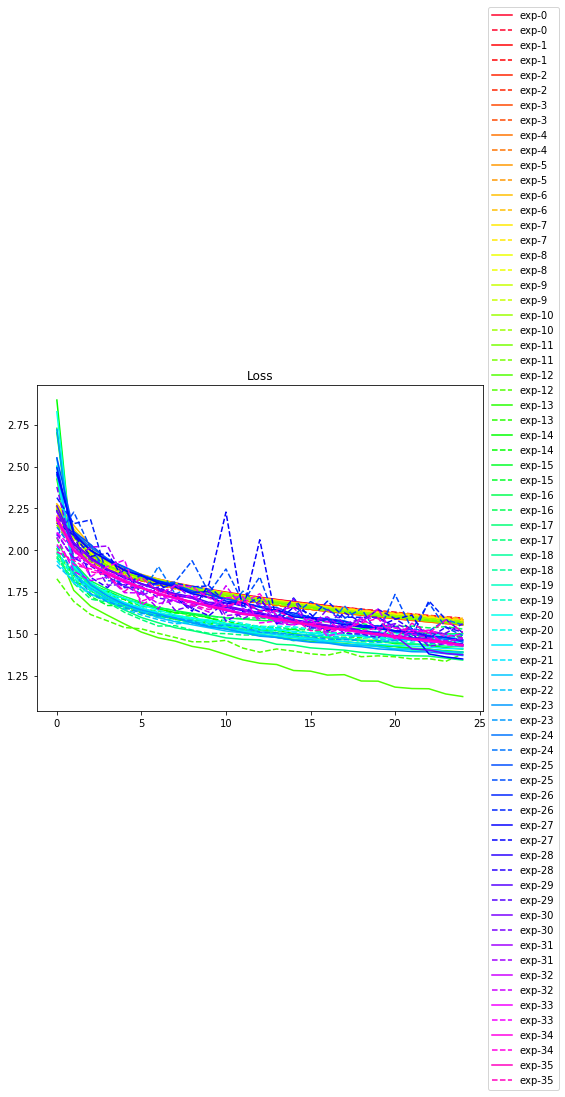

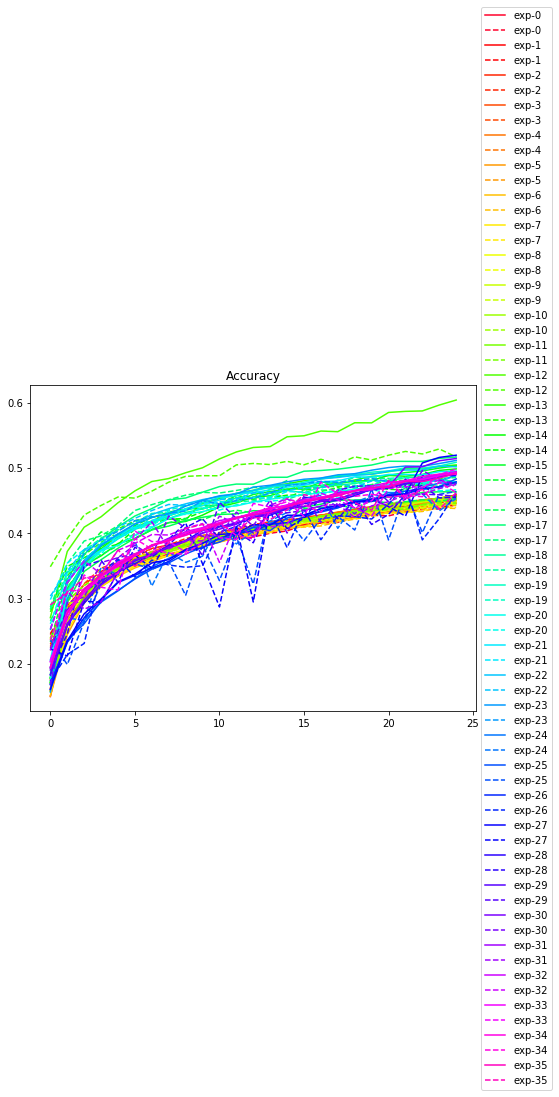

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()